In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

### Suppose that a year have 252 trading days. Let's generate 10 years of data

In [3]:
trading_days_in_year = 252
T = 10
N = int(trading_days_in_year * T)
dt = T / N
path_count = 2 ** 15


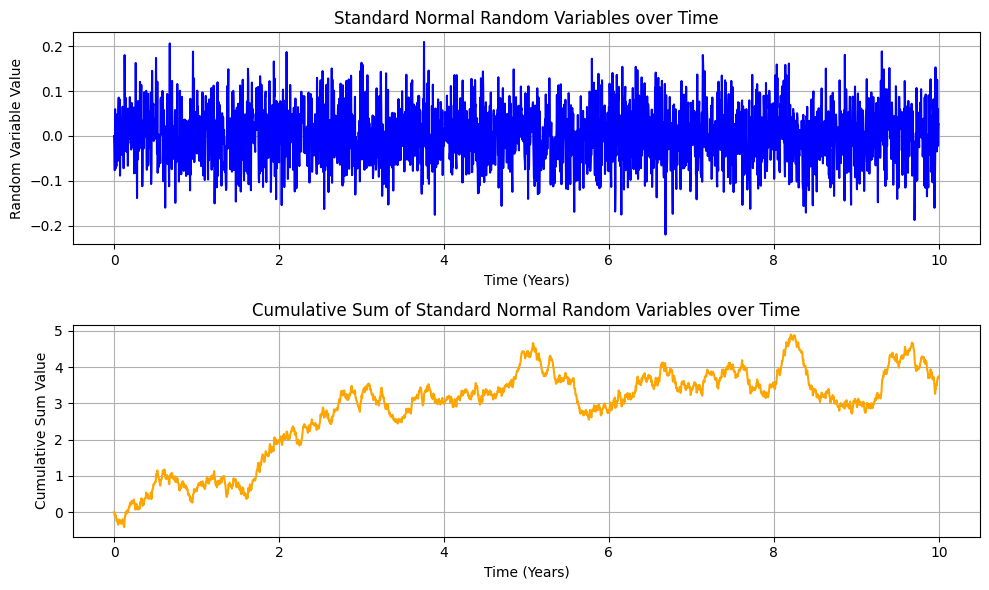

In [4]:
random_norm = norm.rvs(loc=0, scale=np.sqrt(dt), size=N)
x_axis = np.linspace(0, N, N+1) / trading_days_in_year

fig, (plot_up, plot_down) = plt.subplots(ncols=1, nrows=2, figsize=(10, 6))
y_1 = np.hstack([np.array([0]), random_norm])
y_2= y_1.cumsum()

plot_up.plot(x_axis, y_1, color='blue')
plot_up.set_title('Standard Normal Random Variables over Time')
plot_up.set_xlabel('Time (Years)')
plot_up.set_ylabel('Random Variable Value')
plot_up.grid(True)

plot_down.plot(x_axis, y_2, color='orange')
plot_down.set_title('Cumulative Sum of Standard Normal Random Variables over Time')
plot_down.set_xlabel('Time (Years)')
plot_down.set_ylabel('Cumulative Sum Value')
plot_down.grid(True)

plt.tight_layout()
plt.show()


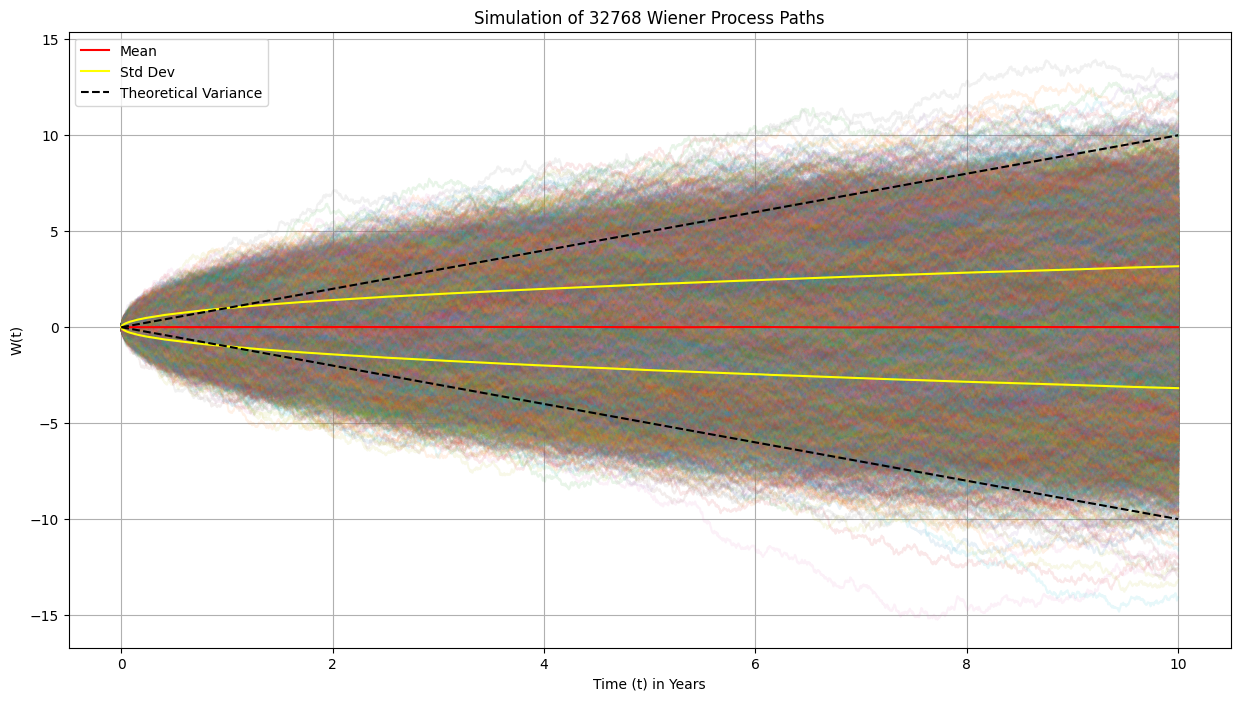

In [6]:
wiener_array = np.zeros((N+1, path_count))

for path in range(path_count):
    random_norm = norm.rvs(loc=0, scale=np.sqrt(dt), size=N)
    wiener_array[1:, path] = random_norm.cumsum()

process_mean = np.mean(wiener_array, axis=1)  # Mean at each time point
process_std = np.std(wiener_array, axis=1)   # Std dev at each time point
theoretical_variance = np.array(range(N+1)) / T

plt.figure(figsize=(15, 8))
plt.title(f"Simulation of {path_count} Wiener Process Paths")
plt.xlabel("Time (t) in Years")
plt.ylabel("W(t)")
plt.grid(True)

plt.plot(x_axis, wiener_array, alpha=0.1, label='_paths_')
plt.plot(x_axis, process_mean, color='red', label='Mean')
plt.plot(x_axis, process_std, color='yellow', label='Std Dev')
plt.plot(x_axis, -process_std, color='yellow')
plt.plot(x_axis, x_axis, color='black', linestyle='--')
plt.plot(x_axis, -x_axis, color='black', linestyle='--', label='Theoretical Variance')

plt.legend()
plt.show()


[]

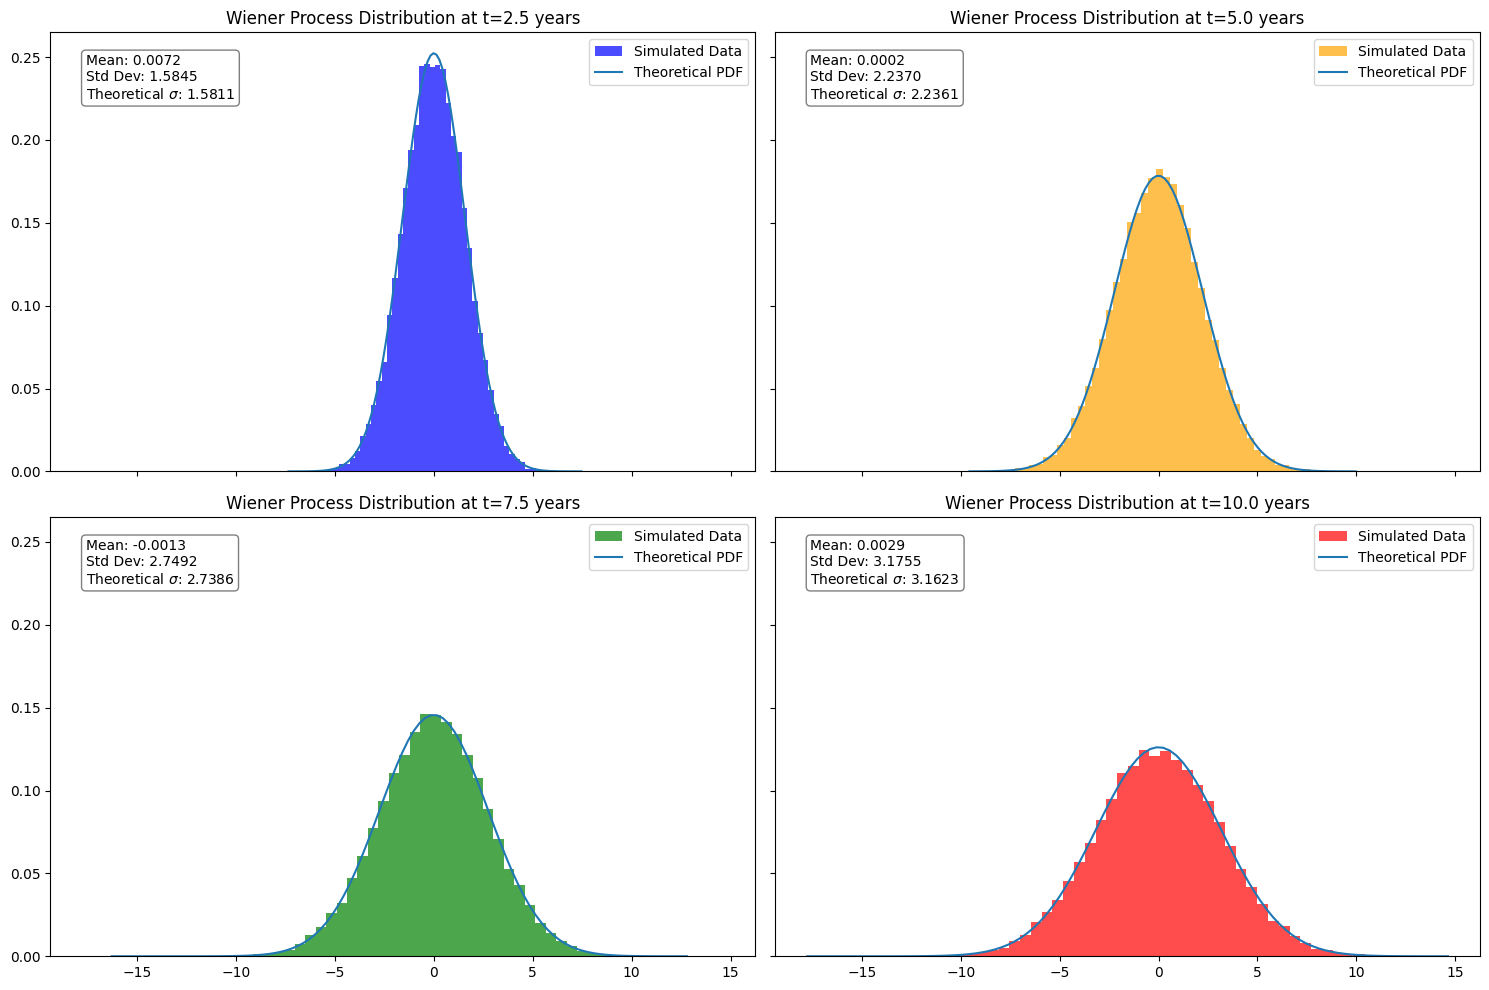

In [7]:
indicies = [int(N / 4), int(N / 2), int(3 * N / 4), N]
titles = [f'Wiener Process Distribution at t={np.round(ind / trading_days_in_year, 2)} years' for ind in indicies]
colors = ['blue', 'orange', 'green', 'red']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, ax in enumerate(axes):
    idx = indicies[i]
    data = wiener_array[idx, :]
    
    mu = 0
    sigma = np.sqrt(idx / trading_days_in_year)
    
    ax.hist(data, bins=50, color=colors[i], alpha=0.7, density=True, label='Simulated Data')
    x_range = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
    pdf = norm.pdf(x_range, mu, sigma)
    ax.plot(x_range, pdf, label='Theoretical PDF')
    
    stats_text = (f'Mean: {data.mean():.4f}\n'
                  f'Std Dev: {data.std():.4f}\n'
                  f'Theoretical $\sigma$: {np.sqrt(idx / trading_days_in_year):.4f}')
    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    ax.set_title(titles[i])
    ax.legend()

plt.tight_layout()
plt.plot()

In [ ]:
# TODO: verify how dt parameter affects the simulation accuracy and performance
# Consider experimenting with different values of dt to observe changes in the Wiener process paths and their 
# statistical properties.


In [ ]:
# TODO: Verify Centrum Limit Theorem by comparing simulated distributions (Gemini chat) 

In [ ]:
# TODO: correlated Wiener process